In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('BlackFriday.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


## Data Cleaning

In [4]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [5]:
df.drop(columns=['Product_Category_2','Product_Category_3'],inplace=True)

In [6]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [7]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

## Analysing cols 

### how many uniq user

In [10]:
df['User_ID'].nunique()

5891

In [11]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

### how many uniq products

In [13]:
df['Product_ID'].nunique()

3623

In [14]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00038842',
       'P00295642', 'P00091742'], dtype=object)

### how many uniq age categories

In [16]:
df['Age'].nunique()

7

In [17]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

### how many uniq occoupation

In [19]:
df['Occupation'].nunique()

21

In [20]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

### how many uniq city category

In [22]:
df['City_Category'].nunique()

3

In [23]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

### how many uniq stay in current city

In [25]:
df['Stay_In_Current_City_Years'].nunique()

5

In [26]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

### how many uniq category

In [28]:
df['Product_Category_1'].nunique()

18

In [29]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

### how much total money is spent 

In [31]:
df['Purchase'].sum()

5017668378

### automating above process

In [33]:
### uniq vals in each col
for col in df.columns:
    print(col,'',df[col].nunique())

User_ID  5891
Product_ID  3623
Gender  2
Age  7
Occupation  21
City_Category  3
Stay_In_Current_City_Years  5
Marital_Status  2
Product_Category_1  18
Purchase  17959


## Analysing genders

### how many males and females are there

In [36]:
df['Gender'].value_counts()

Gender
M    405380
F    132197
Name: count, dtype: int64

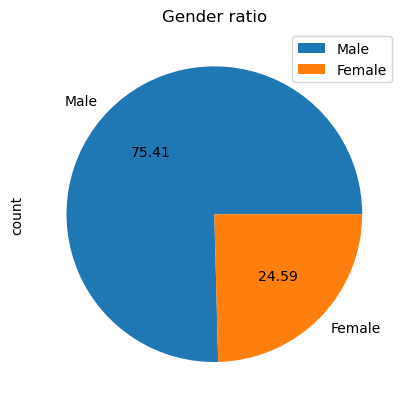

In [37]:
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Male','Female'],title='Gender ratio')
plt.legend()
plt.show()

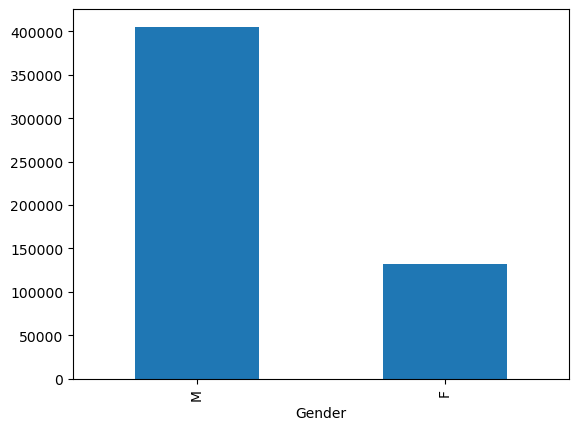

In [38]:
df['Gender'].value_counts().plot(kind='bar')
plt.show()

### how many money is spent by males and females

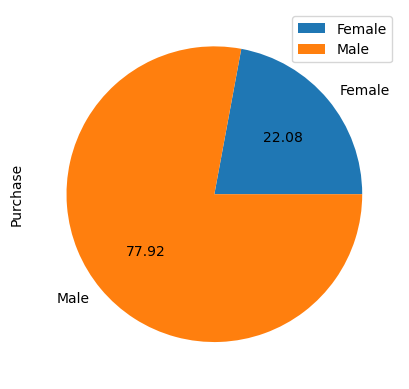

In [40]:
df.head(10000).groupby('Gender').sum()['Purchase'].plot(kind='pie',autopct='%.2f',labels=['Female','Male'])
plt.legend()
plt.show()

### how much avg price is spent by male and female

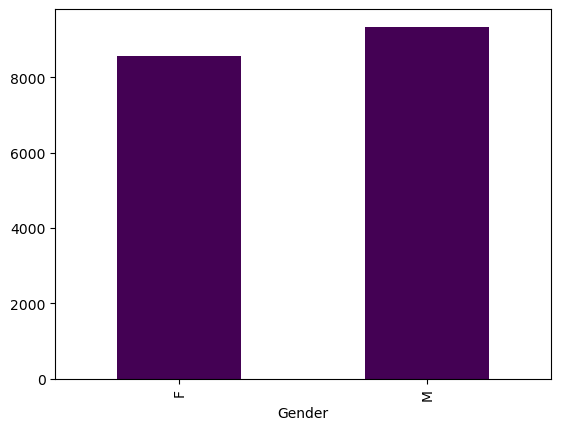

In [42]:
df.head(10000).groupby('Gender').mean(numeric_only=True)['Purchase'].plot(kind='bar',cmap='viridis')
plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Purchase                    537577 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 41.0+ MB


In [44]:
df['Purchase']

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
537572    11664
537573    19196
537574     8043
537575     7172
537576     6875
Name: Purchase, Length: 537577, dtype: int64

## Analysing age and martial status

### how many products are purchased by each age category

<Axes: title={'center': 'Purchase distribution by Age'}, xlabel='Age'>

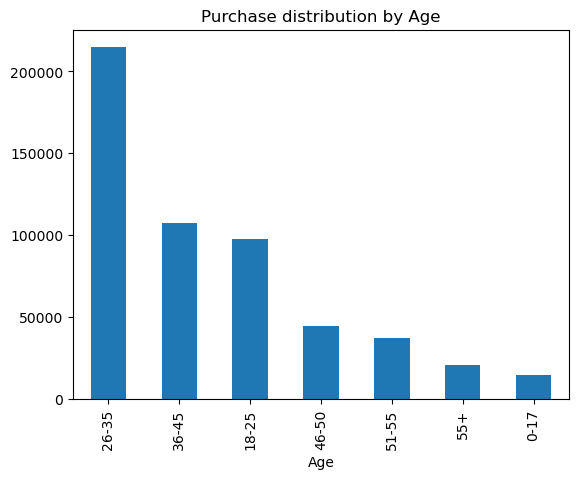

In [47]:
df['Age'].value_counts().plot(kind='bar',title='Purchase distribution by Age')

<Axes: title={'center': 'Purchase distribution by Age'}, xlabel='Age'>

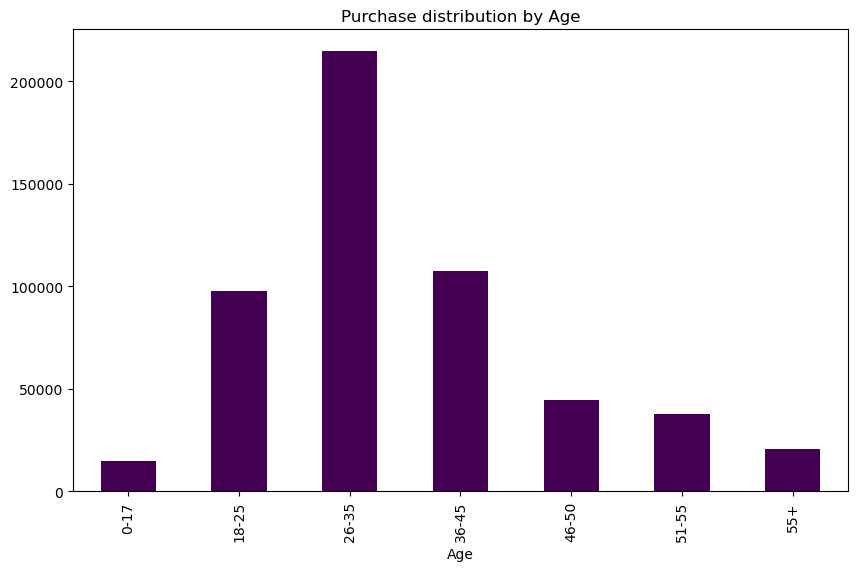

In [48]:
df.groupby('Age').size().plot(kind='bar',cmap='viridis',title='Purchase distribution by Age',figsize=(10,6))

### number of uniq products purchaesed by each age category

In [50]:
lst = []
for i in df['Age'].unique():
    lst.append([i,':',df[df['Age']==i]['Product_ID'].nunique()])

In [51]:
df[df['Age']=='0-17']['Product_ID'].nunique()

2300

In [52]:
lst

[['0-17', ':', 2300],
 ['55+', ':', 2573],
 ['26-35', ':', 3419],
 ['46-50', ':', 3099],
 ['51-55', ':', 2877],
 ['36-45', ':', 3318],
 ['18-25', ':', 3213]]

In [53]:
data = pd.DataFrame(lst)
data

,0,1,2
0,0-17,:,2300
1,55+,:,2573
2,26-35,:,3419
3,46-50,:,3099
4,51-55,:,2877
5,36-45,:,3318
6,18-25,:,3213


In [54]:
data.drop(columns=[1],inplace=True)
data

,0,2
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


In [55]:
data.rename(columns={0:'Age',2:'Uniq_Products'},inplace=True)
data

,Age,Uniq_Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


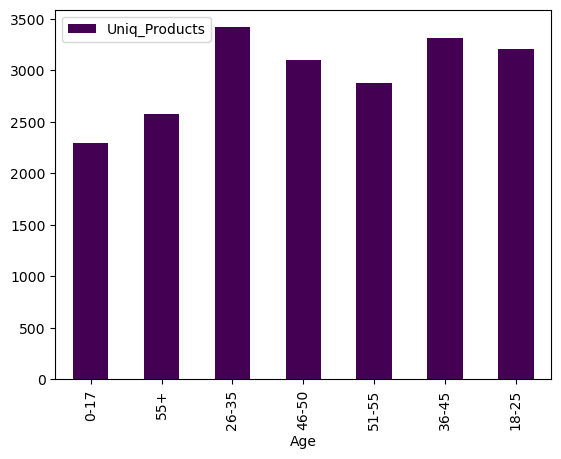

In [56]:
data.plot.bar(x='Age',cmap='viridis')
plt.show()

### how much spent by each age category

<Axes: xlabel='Age'>

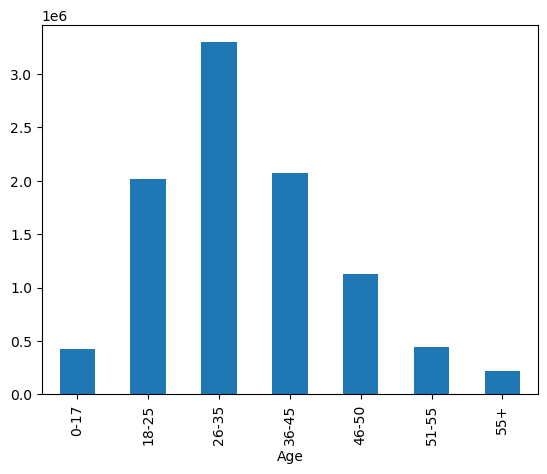

In [58]:
df.head(1000).groupby('Age').sum()['Purchase'].plot.bar(x='Age')

### how much avg spent by each category

<Axes: xlabel='Age'>

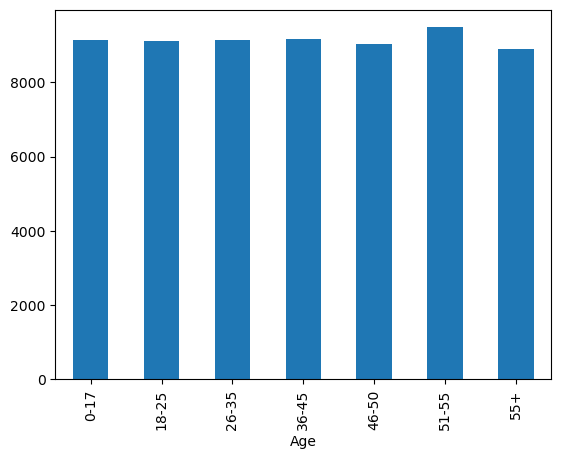

In [60]:
df.head(10000).groupby('Age').mean(numeric_only=True)['Purchase'].plot.bar(x='Age')

## multi col analysis

### agewise gender count

<Axes: xlabel='Age', ylabel='count'>

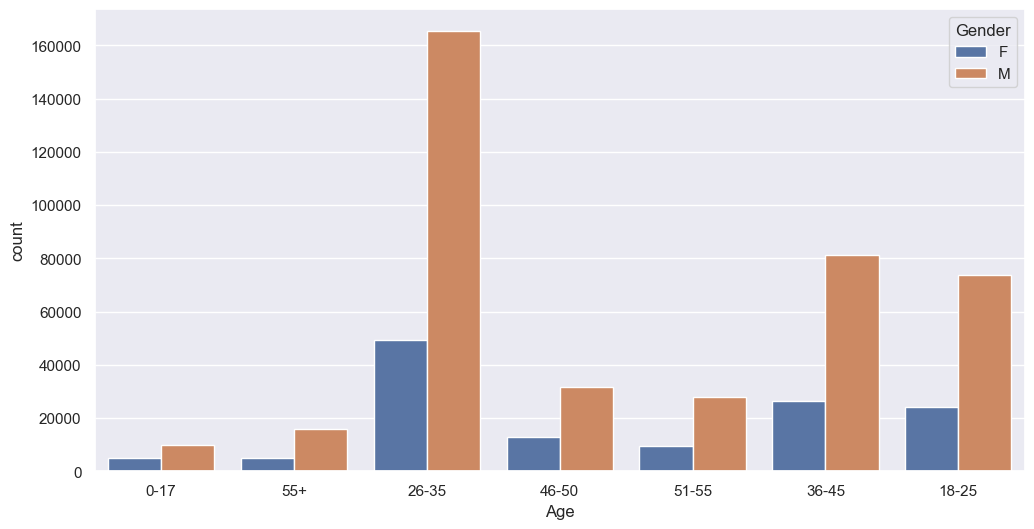

In [63]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(data=df,x='Age',hue='Gender')

### agewise martial status count

<Axes: xlabel='Age', ylabel='count'>

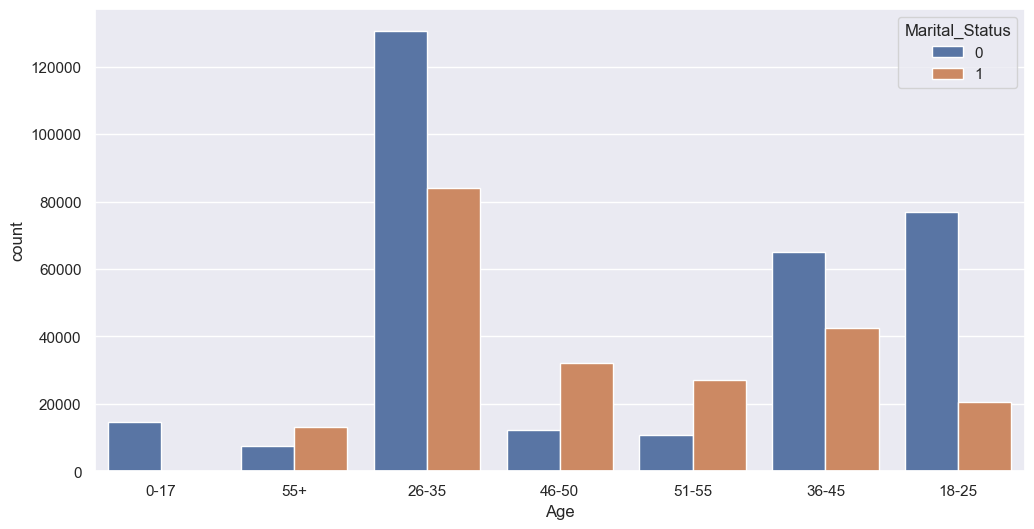

In [65]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(data=df,x='Age',hue='Marital_Status')

### gnderwise martial ststus count

<Axes: xlabel='Gender', ylabel='count'>

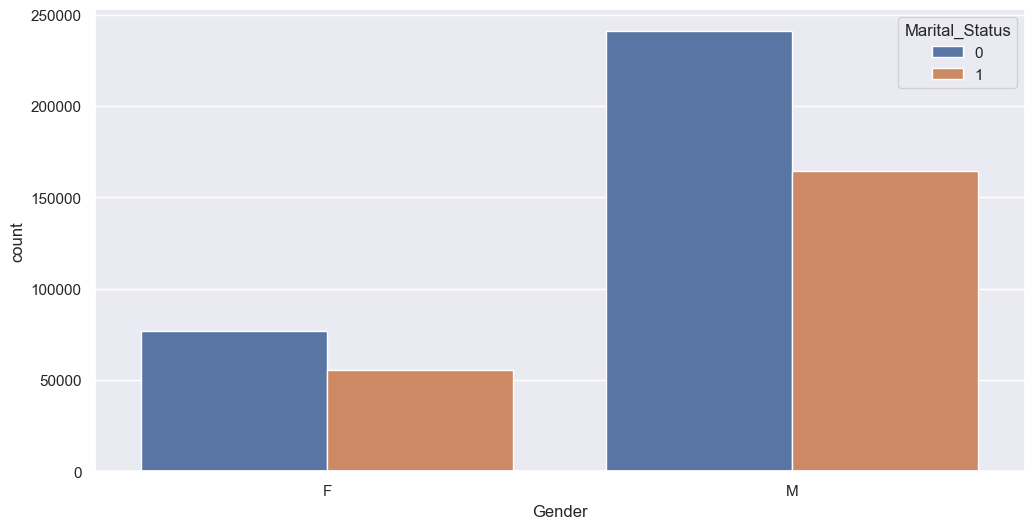

In [67]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(data=df,x='Gender',hue='Marital_Status')

### city categorywise age count

<Axes: xlabel='City_Category', ylabel='count'>

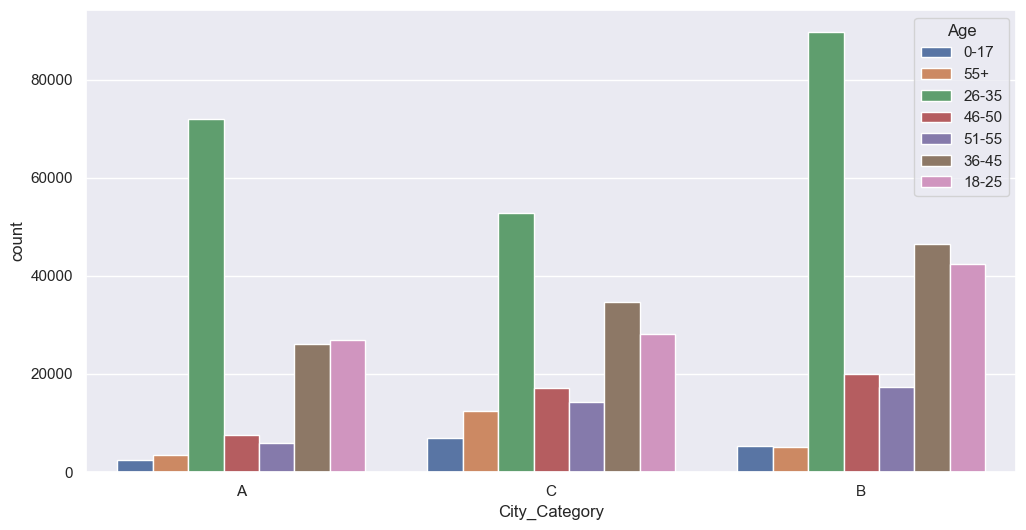

In [69]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(data=df,x='City_Category',hue='Age')

In [70]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


### city categorywise gender count

<Axes: xlabel='City_Category', ylabel='count'>

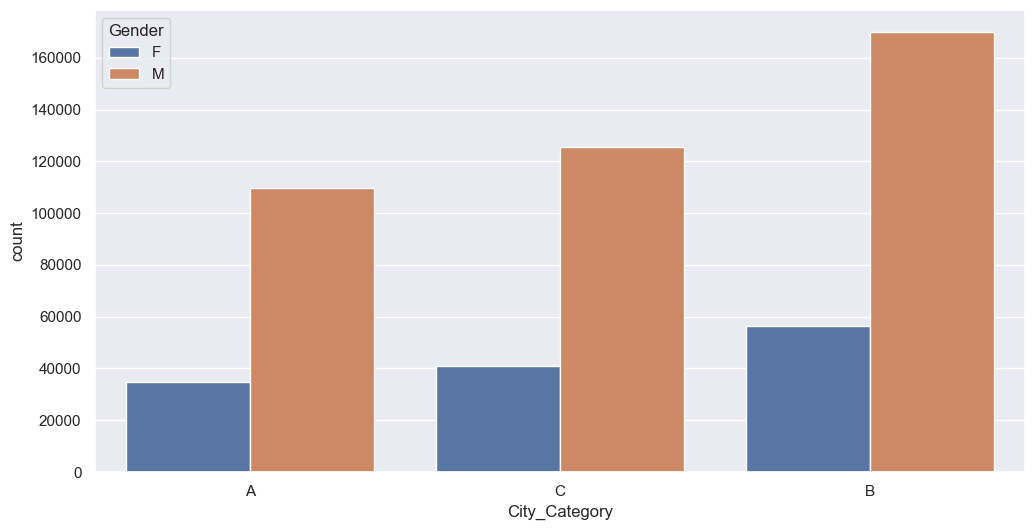

In [72]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(data=df,x='City_Category',hue='Gender')

### how many people form which city_category

<Axes: xlabel='City_Category', ylabel='count'>

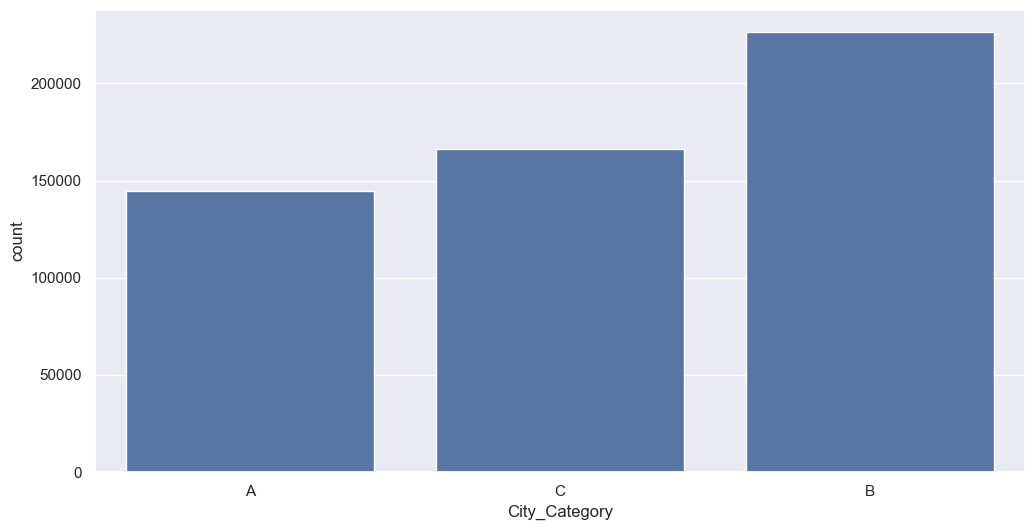

In [74]:
sns.countplot(data=df,x='City_Category')

<Axes: >

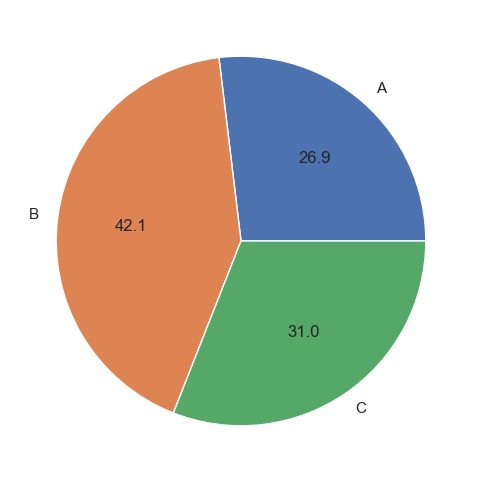

In [75]:
df.groupby('City_Category').size().plot(kind='pie',autopct='%.1f')

### city categorywise martial stsus count

<Axes: xlabel='City_Category', ylabel='count'>

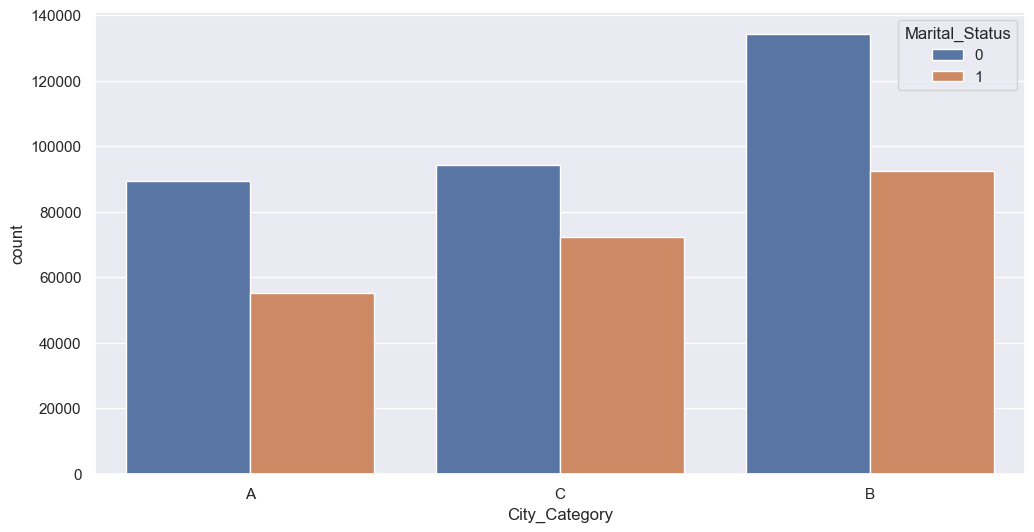

In [77]:
sns.countplot(data=df,x='City_Category',hue='Marital_Status')

## city categorywise amount spent

<Axes: xlabel='City_Category'>

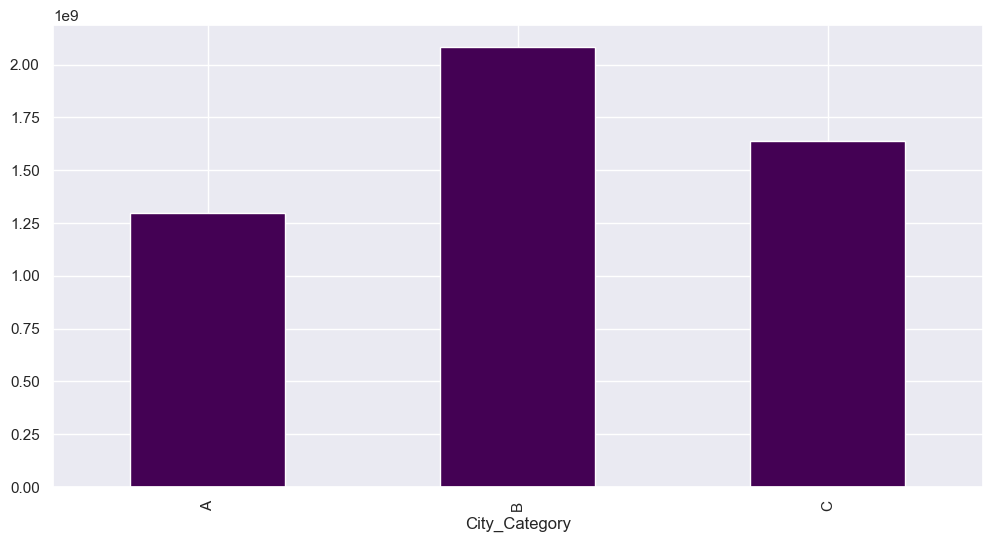

In [79]:
df.groupby('City_Category').sum()['Purchase'].plot(kind='bar',cmap='viridis')

<Axes: ylabel='Purchase'>

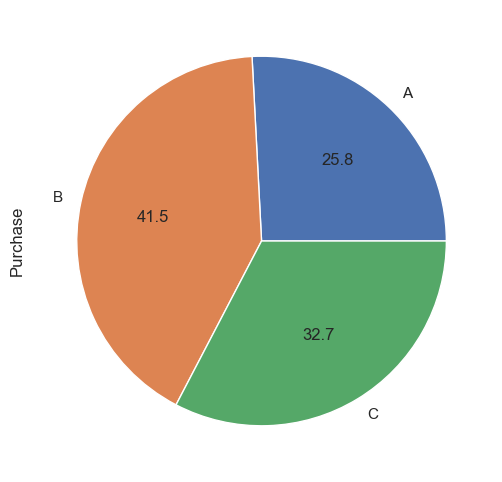

In [80]:
df.groupby('City_Category').sum()['Purchase'].plot(kind='pie',autopct='%.1f')

## city categorywise avg amount spent

<Axes: xlabel='City_Category'>

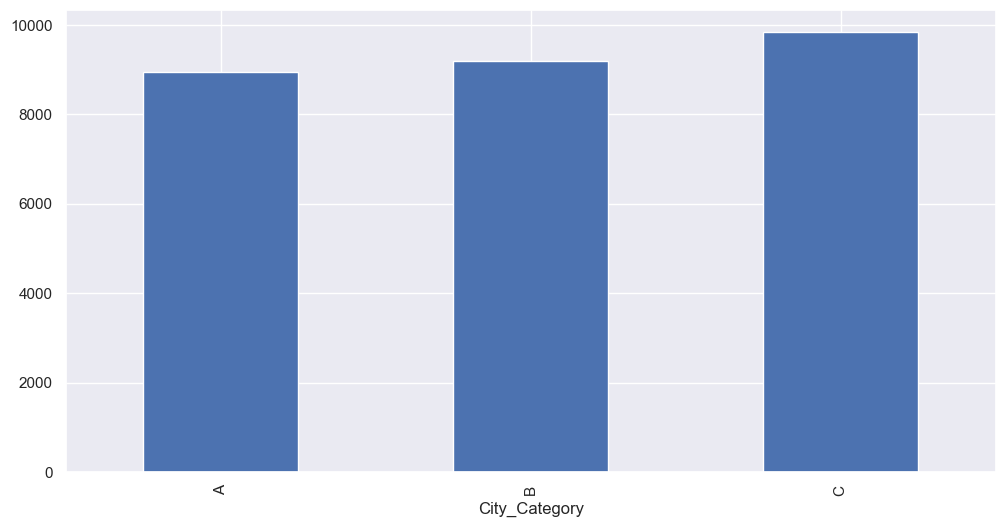

In [82]:
df.groupby('City_Category').mean(numeric_only=True)['Purchase'].plot(kind='bar')

<Axes: ylabel='Purchase'>

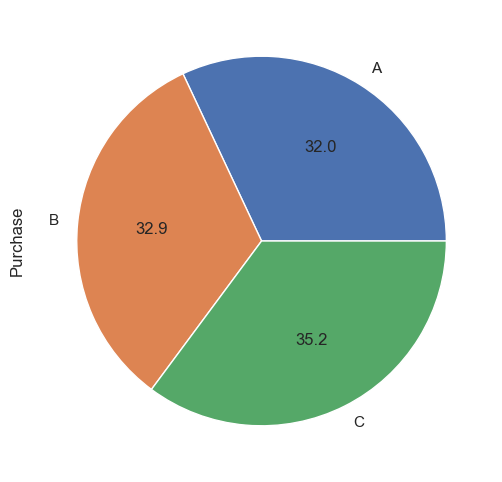

In [83]:
df.groupby('City_Category').mean(numeric_only=True)['Purchase'].plot(kind='pie',autopct='%.1f')

## occoupation and products analysis

In [85]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

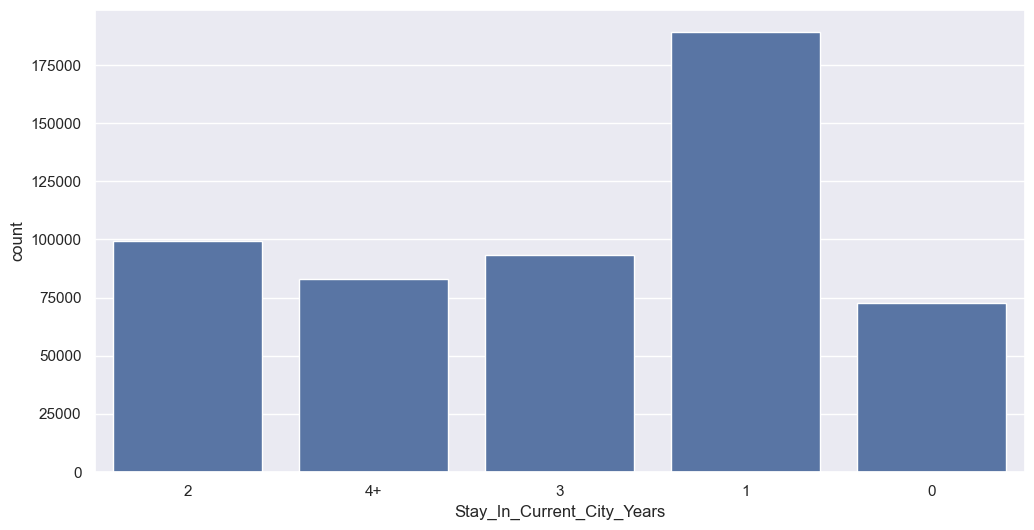

In [86]:
sns.countplot(data=df,x='Stay_In_Current_City_Years')

<Axes: >

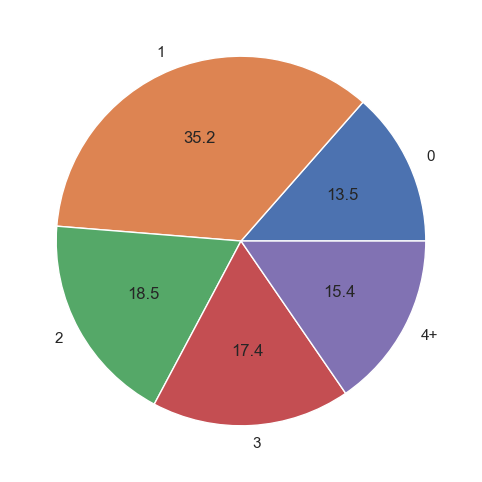

In [87]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind='pie',autopct='%.1f')

### stay_in_years wise age count

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

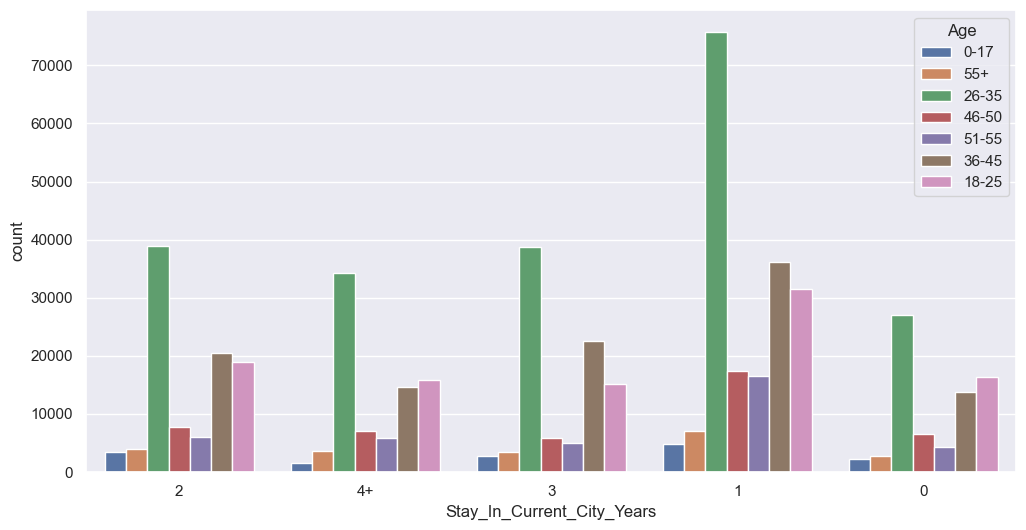

In [89]:
sns.countplot(data=df,x='Stay_In_Current_City_Years',hue='Age')

### stay_in_years wise gender count

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

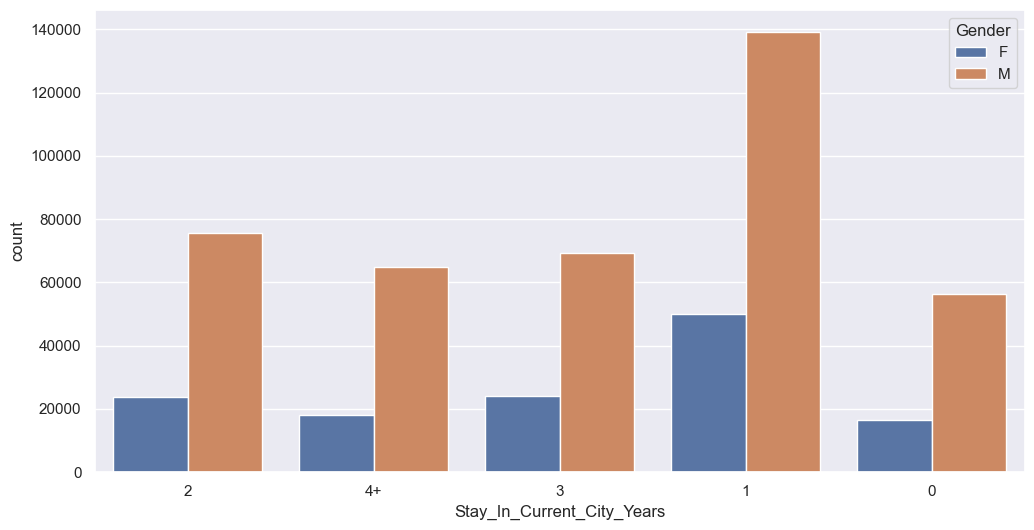

In [91]:
sns.countplot(data=df,x='Stay_In_Current_City_Years',hue='Gender')

### stay_in_years wise martila status count

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

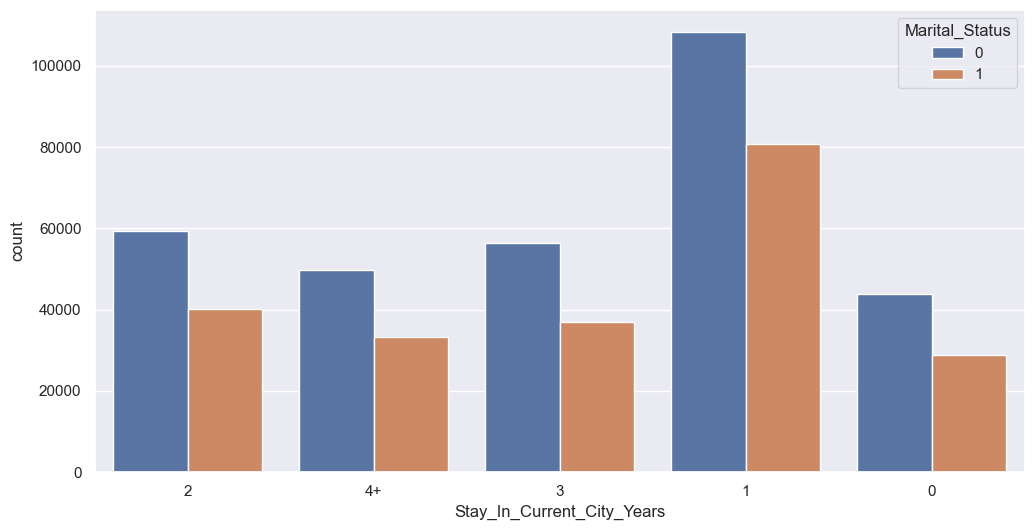

In [93]:
sns.countplot(data=df,x='Stay_In_Current_City_Years',hue='Marital_Status')

### stay_in_year wise city_catgory count

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

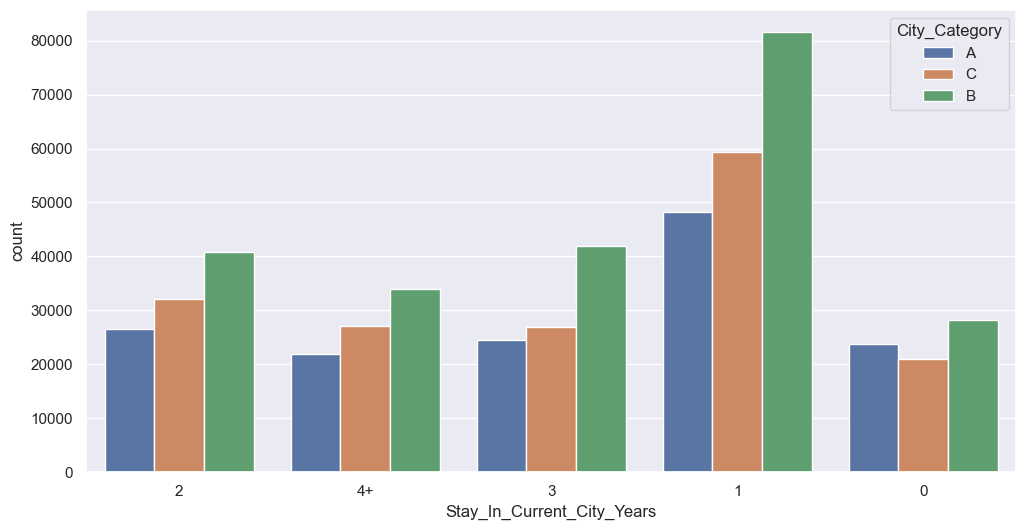

In [95]:
sns.countplot(data=df,x='Stay_In_Current_City_Years',hue='City_Category')

 ### stay_in_years wise money spent

<Axes: xlabel='Stay_In_Current_City_Years'>

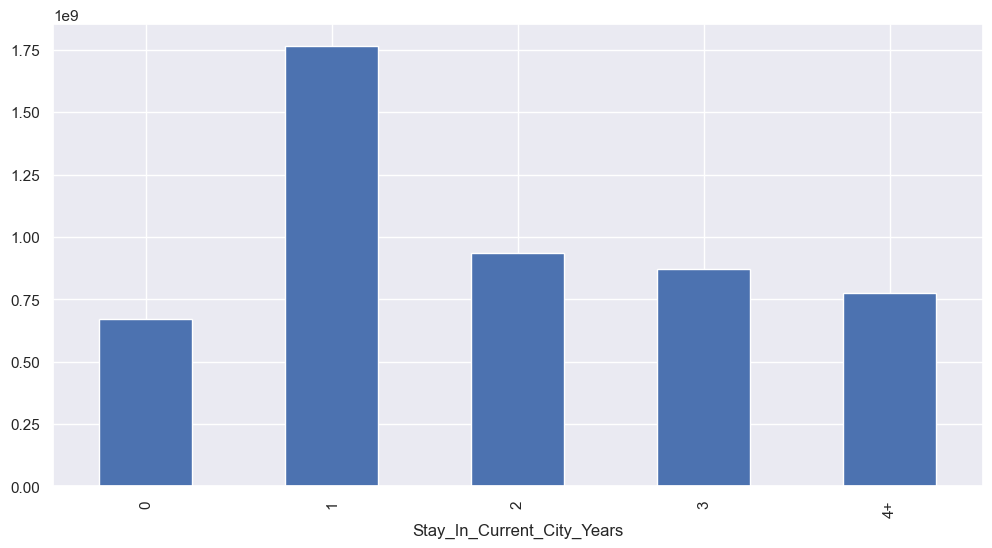

In [97]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind='bar')

### stay_in_year wise avg money spent

<Axes: xlabel='Stay_In_Current_City_Years'>

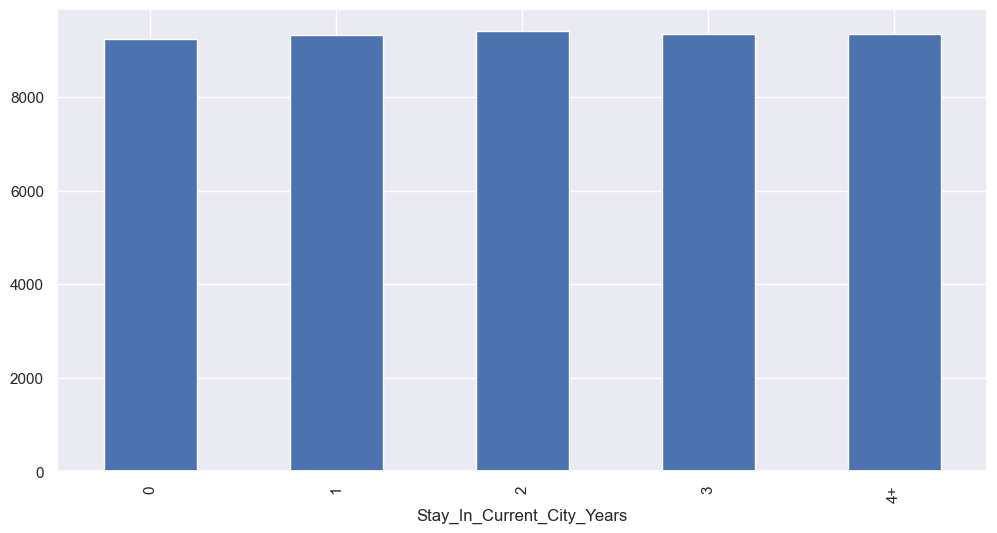

In [99]:
df.groupby('Stay_In_Current_City_Years').mean(numeric_only=True)['Purchase'].plot(kind='bar')

### occoupation wise count

<Axes: xlabel='Occupation', ylabel='count'>

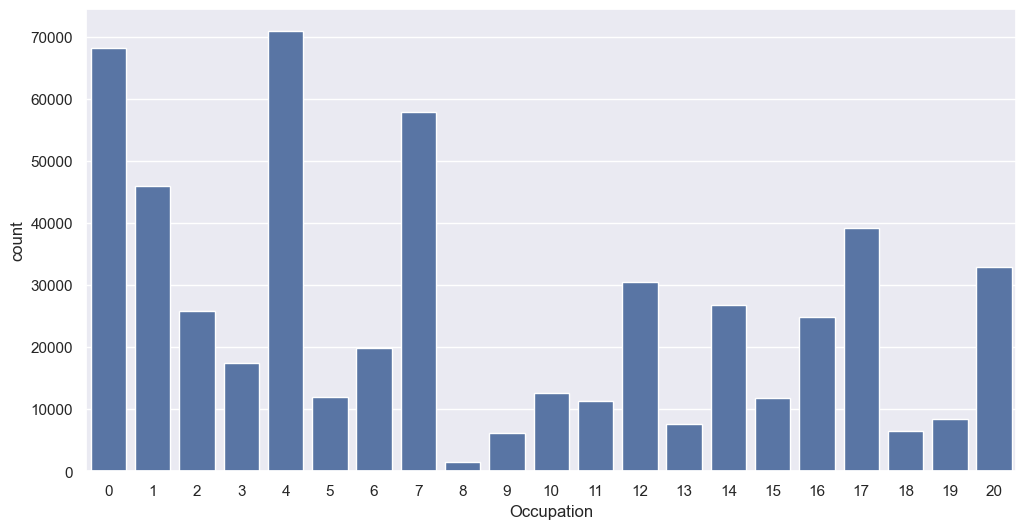

In [101]:
sns.countplot(data=df,x='Occupation')

<Axes: xlabel='Occupation'>

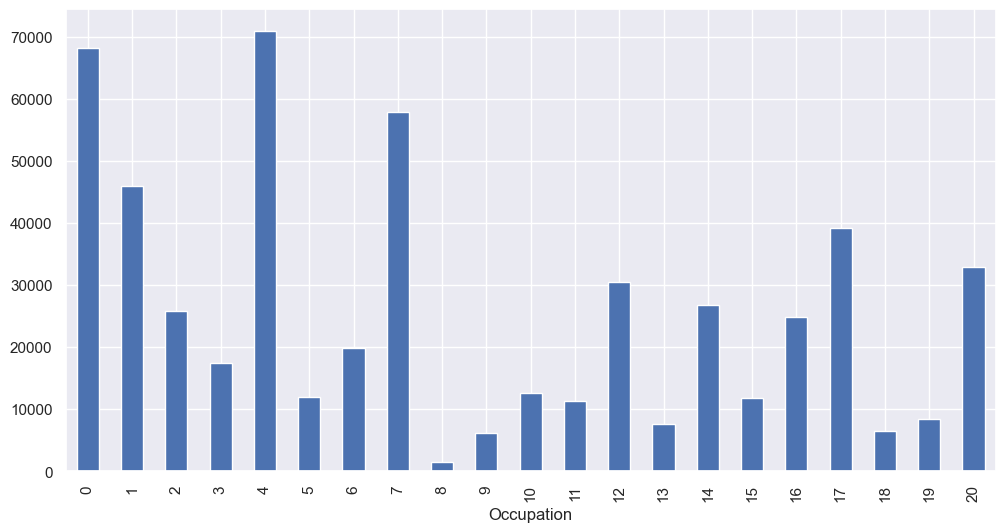

In [102]:
df.groupby('Occupation').size().plot(kind='bar')

<Axes: >

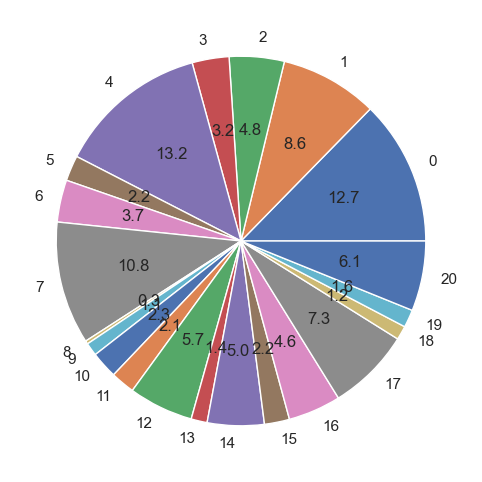

In [103]:
df.groupby('Occupation').size().plot(kind='pie',autopct='%.1f')

### occoupation wise spending

<Axes: xlabel='Occupation'>

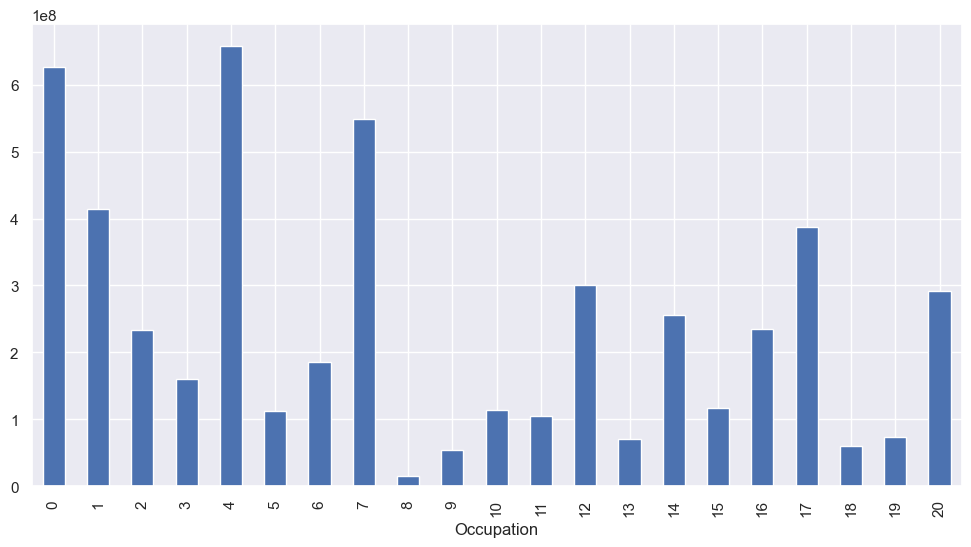

In [105]:
df.groupby('Occupation').sum()['Purchase'].plot(kind='bar')

<Axes: ylabel='Purchase'>

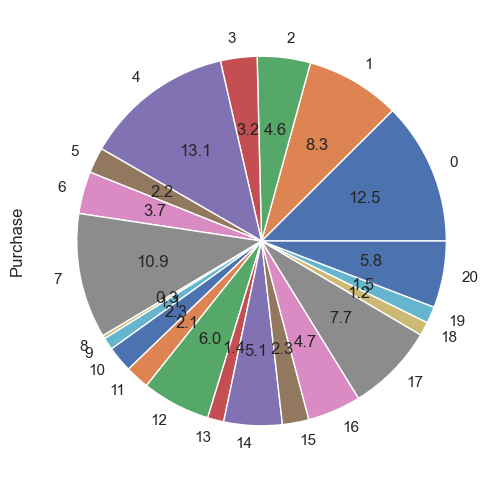

In [106]:
df.groupby('Occupation').sum()['Purchase'].plot(kind='pie',autopct='%.1f')

### occoupation wise avg money spent

<Axes: xlabel='Occupation'>

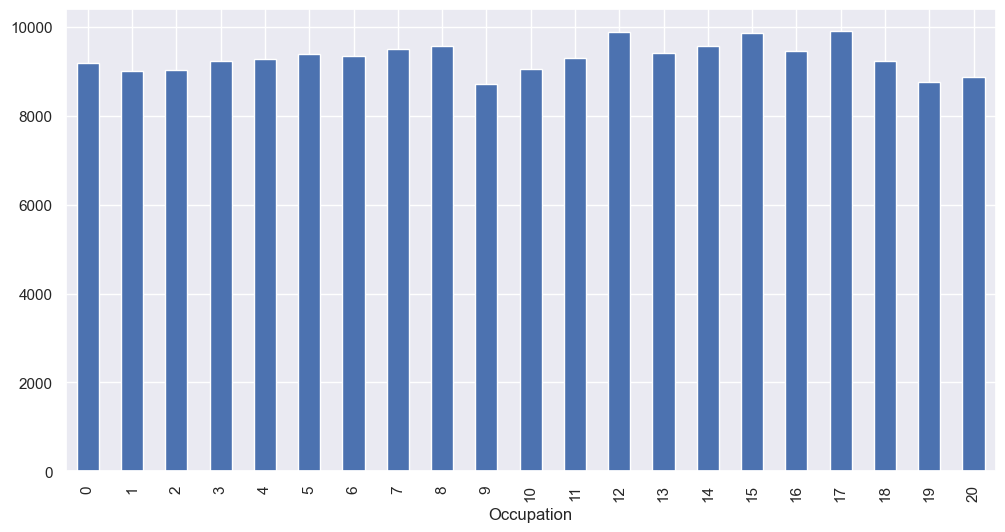

In [108]:
df.groupby('Occupation').mean(numeric_only=True)['Purchase'].plot(kind='bar')

<Axes: ylabel='Purchase'>

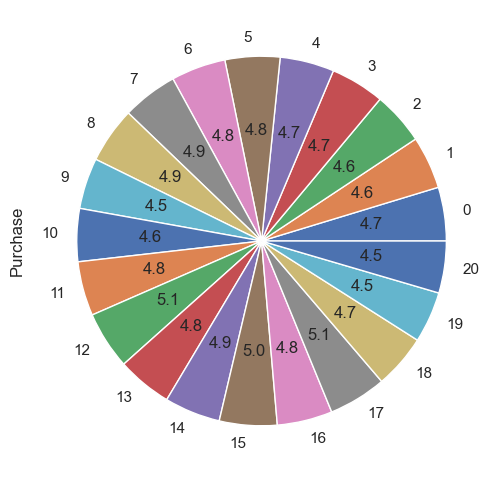

In [109]:
df.groupby('Occupation').mean(numeric_only=True)['Purchase'].plot(kind='pie',autopct='%.1f')

### occoupation wise martial ststus count

<Axes: xlabel='Occupation', ylabel='count'>

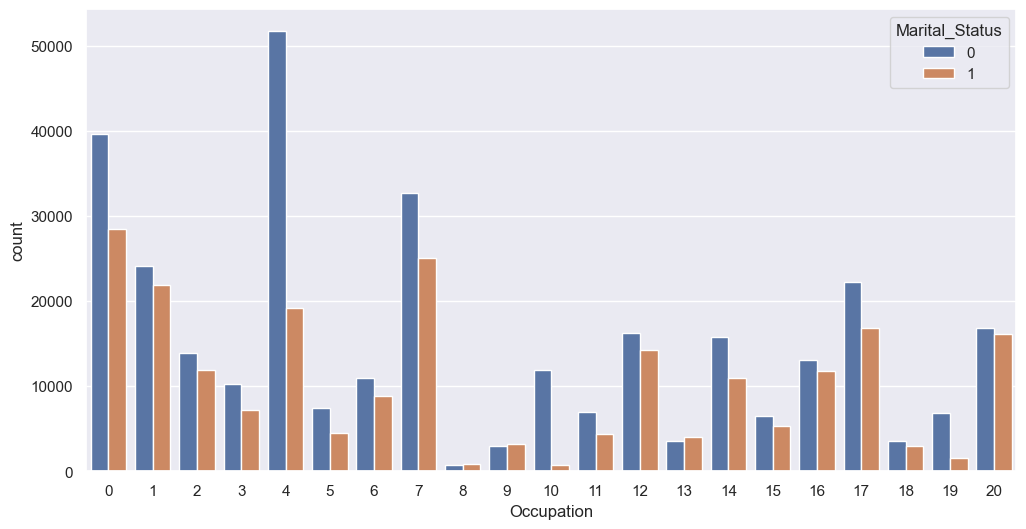

In [111]:
sns.countplot(data=df,x='Occupation',hue='Marital_Status')

### occoupation wise gender count

<Axes: xlabel='Occupation', ylabel='count'>

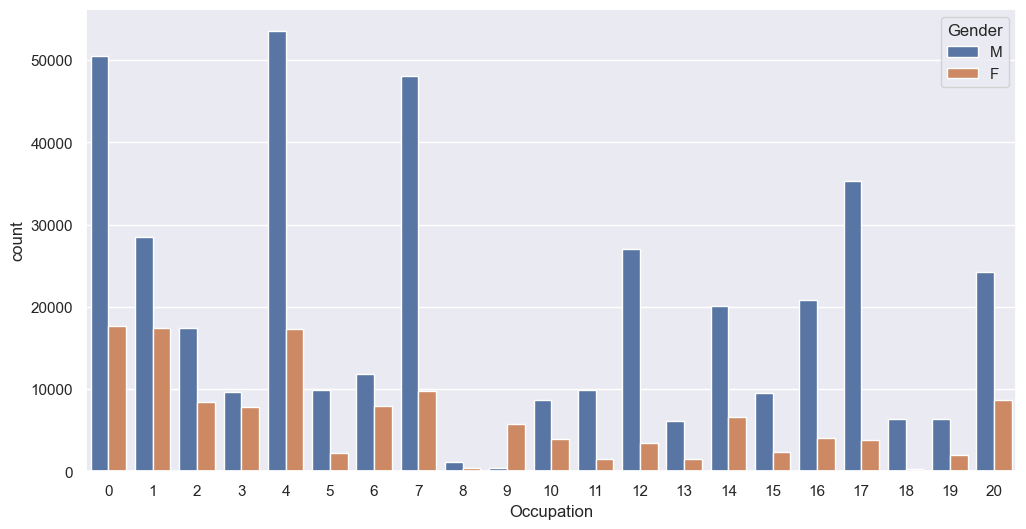

In [113]:
sns.countplot(data=df,x='Occupation',hue='Gender')

### occoupation wise age_category count

<Axes: xlabel='Occupation', ylabel='count'>

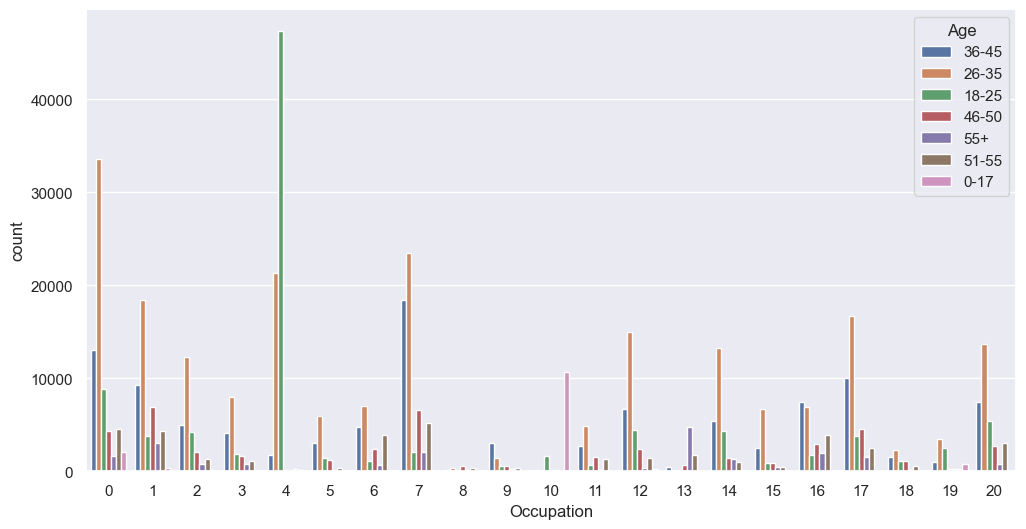

In [115]:
sns.countplot(data=df,x='Occupation',hue='Age')

### occoupation wise uniq product count

<Axes: xlabel='Occupation'>

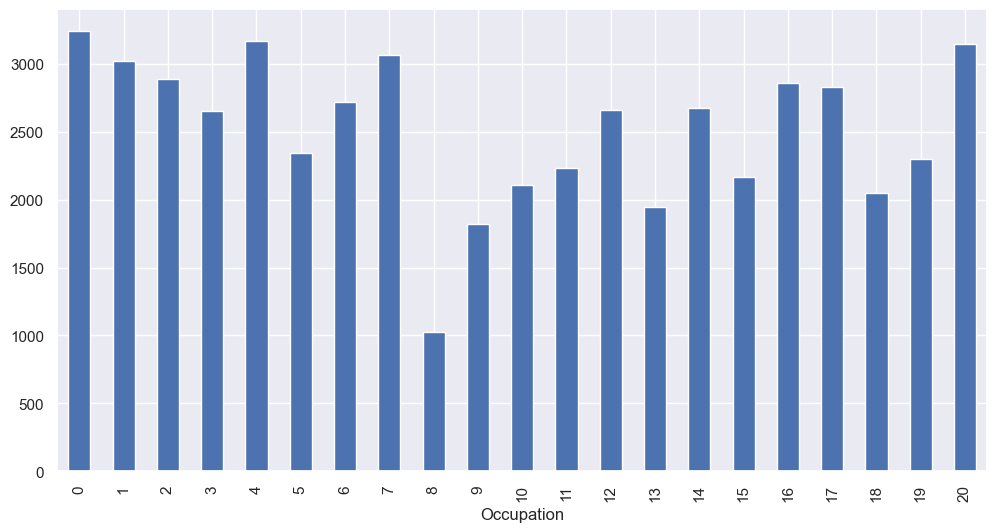

In [117]:
df.groupby('Occupation').nunique()['Product_ID'].plot(kind='bar')

### product_categroy wise count

<Axes: xlabel='Product_Category_1'>

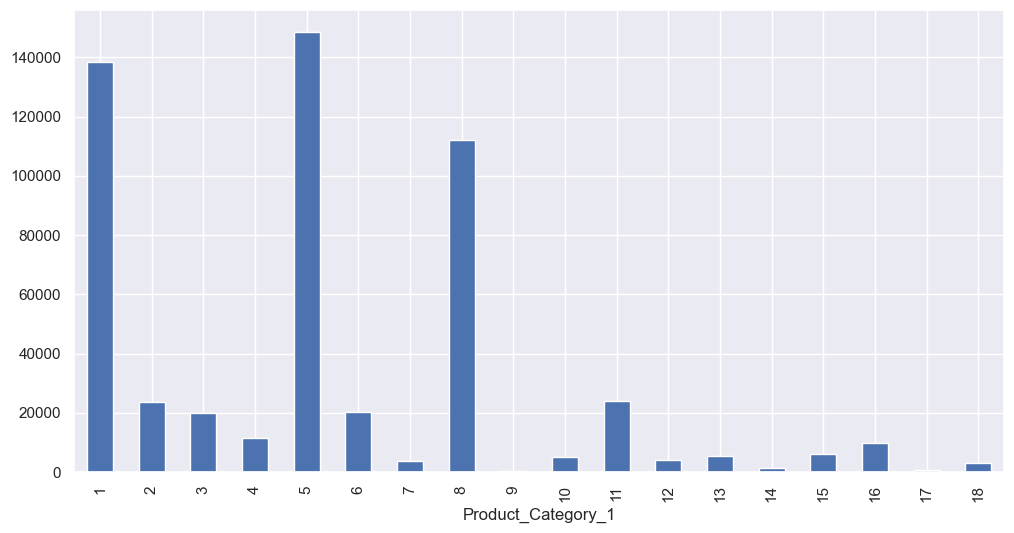

In [119]:
df.groupby('Product_Category_1').size().plot(kind='bar')

<Axes: >

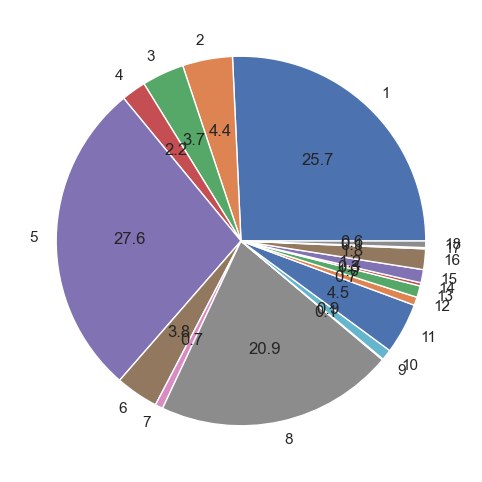

In [120]:
df.groupby('Product_Category_1').size().plot(kind='pie',autopct='%.1f')

### product_category wise money spent

<Axes: xlabel='Product_Category_1'>

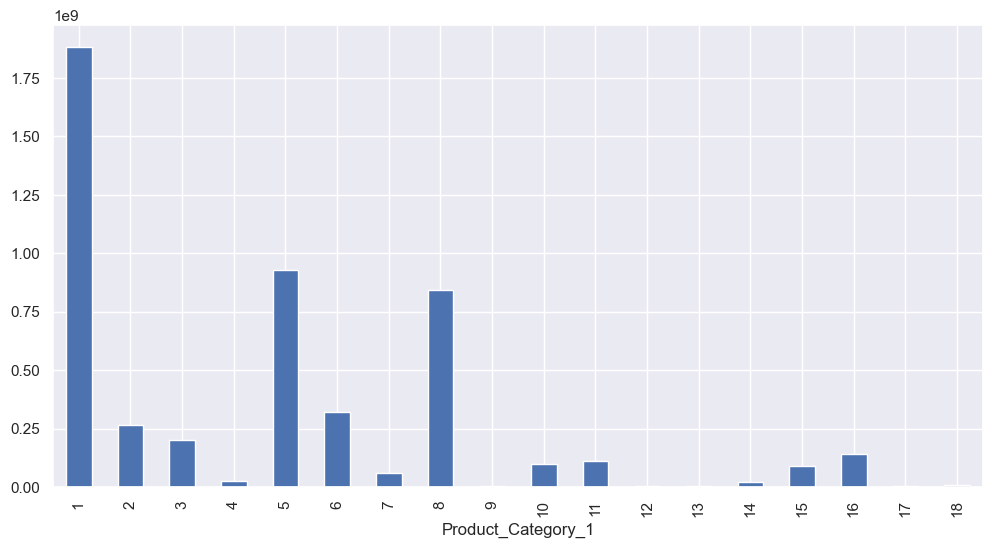

In [122]:
df.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar')

### product_categoey wise avg money spent

<Axes: xlabel='Product_Category_1'>

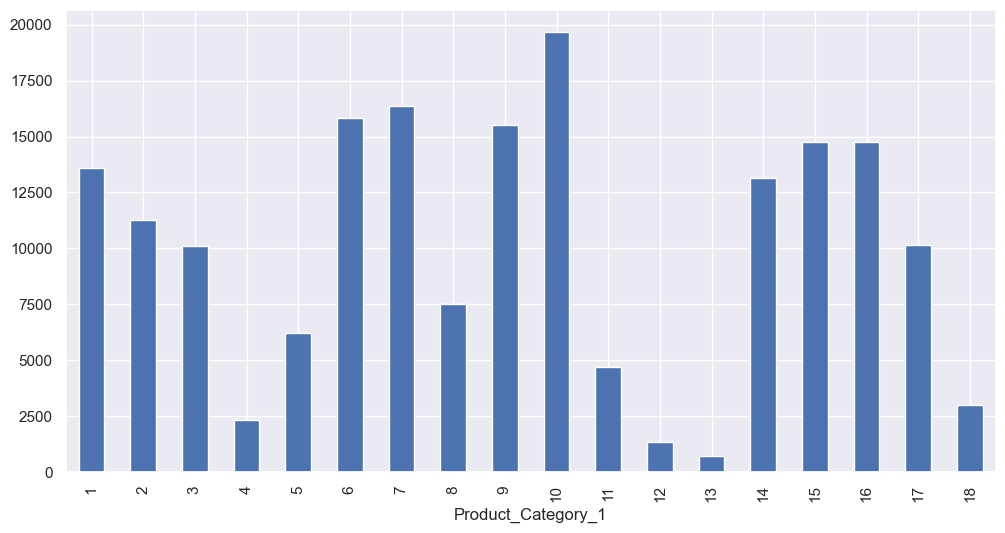

In [124]:
df.groupby('Product_Category_1').mean(numeric_only=True)['Purchase'].plot(kind='bar')

### top n products which people buy more

<Axes: xlabel='Product_ID'>

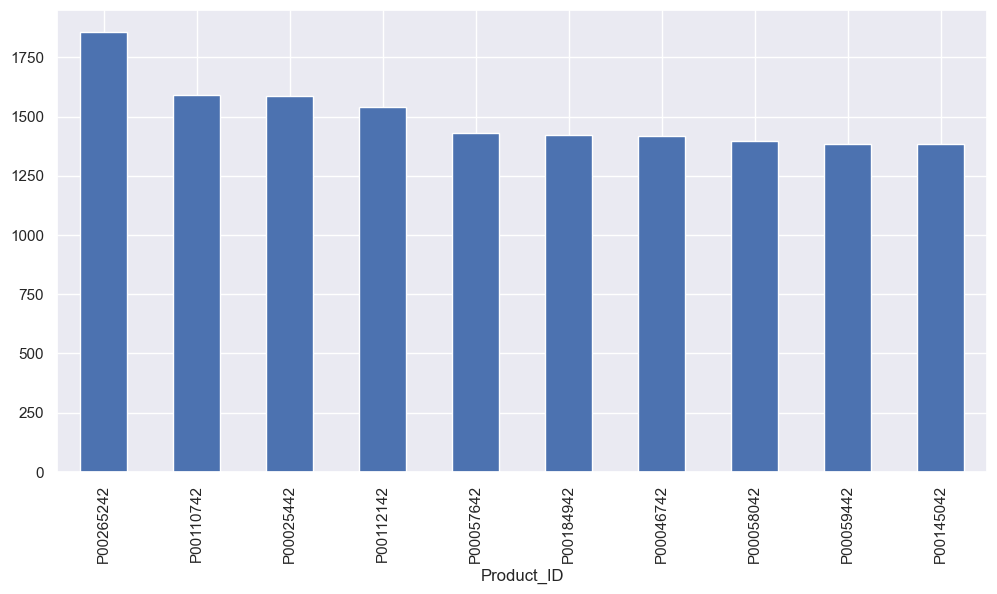

In [126]:
df.groupby('Product_ID').size().nlargest(10).plot(kind='bar')

### top n products which generate more revenue

<Axes: xlabel='Product_ID'>

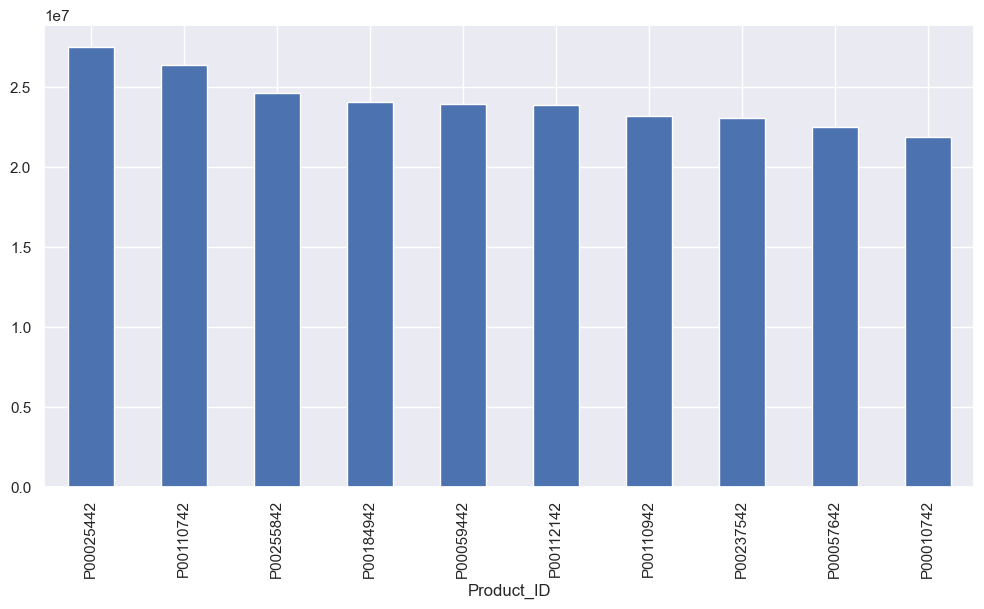

In [128]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).plot(kind='bar')

## combining age and martial staus

In [214]:
lst = []
for i in range(len(df)):
    lst.append(df['Gender'][i]+"_"+str(df['Marital_Status'][i]))

In [216]:
lst

['F_0',
 'F_0',
 'F_0',
 'F_0',
 'M_0',
 'M_0',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_1',
 'F_0',
 'F_0',
 'F_0',
 'M_0',
 'M_0',
 'M_1',
 'M_1',
 'M_1',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'F_1',
 'F_1',
 'M_0',
 'M_0',
 'M_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'F_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_0',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'M_1',
 'F_1',


In [218]:
df['MaritalGender'] = lst

In [220]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0
...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664,M_0
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196,M_0
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043,M_0
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172,M_0


<Axes: xlabel='MaritalGender', ylabel='count'>

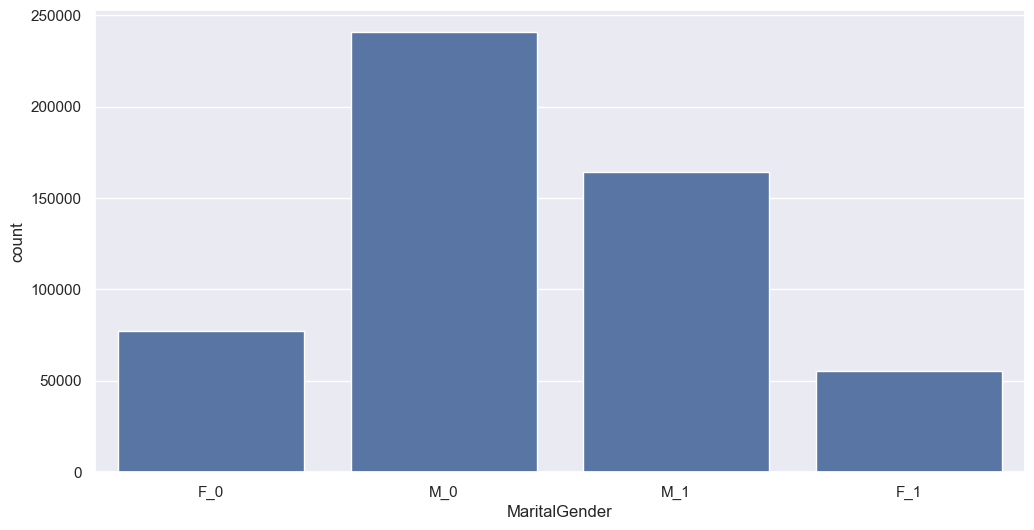

In [222]:
sns.countplot(data=df,x='MaritalGender')

<Axes: >

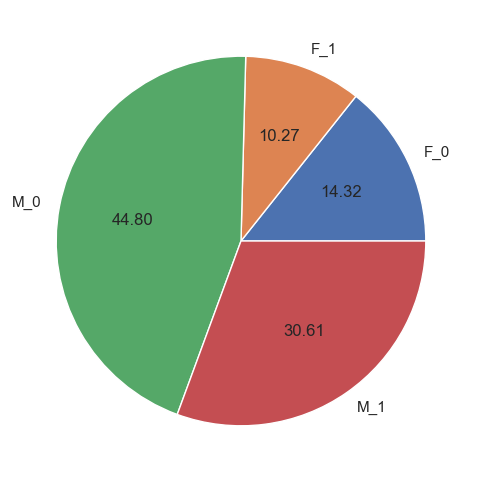

In [226]:
df.groupby('MaritalGender').size().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='Age', ylabel='count'>

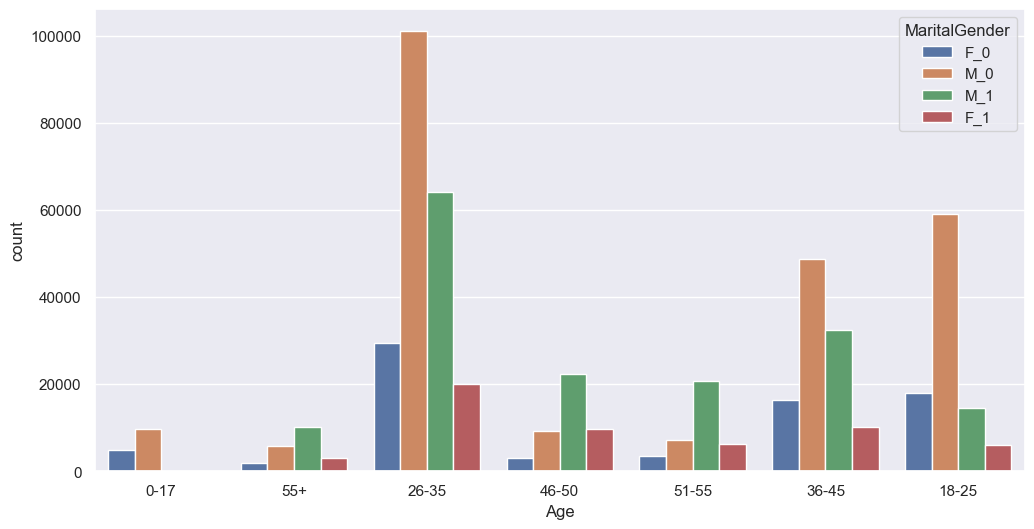

In [232]:
sns.countplot(data=df,x='Age',hue='MaritalGender')

<Axes: xlabel='Product_Category_1', ylabel='count'>

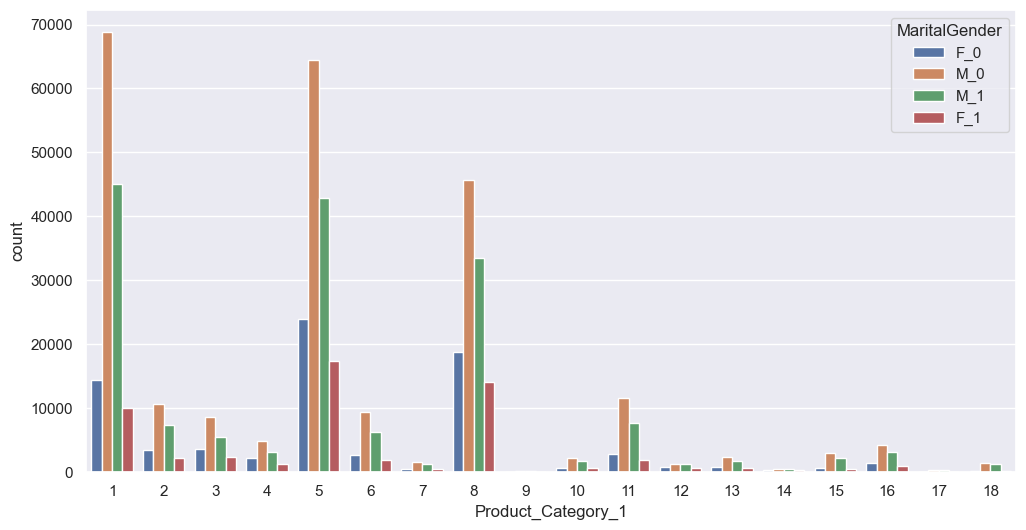

In [234]:
sns.countplot(data=df,x='Product_Category_1',hue='MaritalGender')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

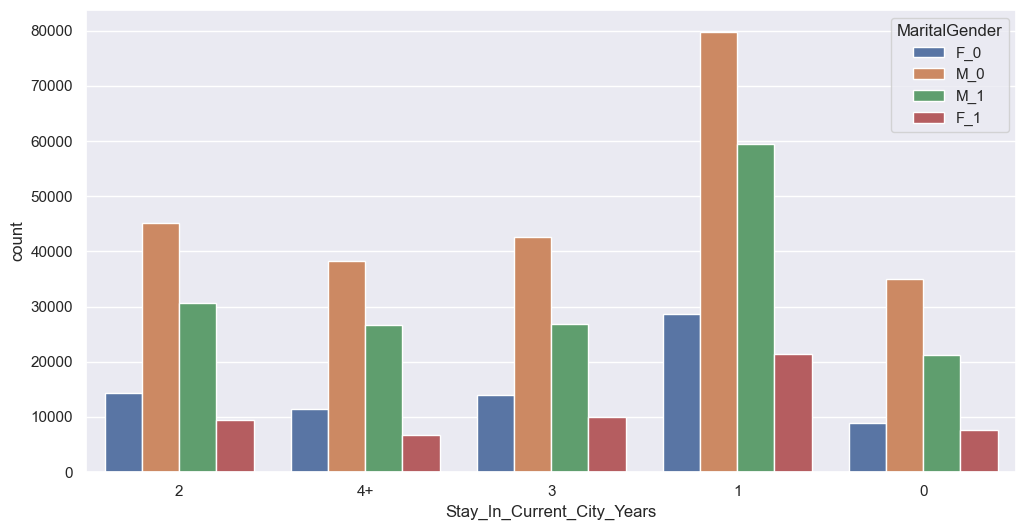

In [236]:
sns.countplot(data=df,x='Stay_In_Current_City_Years',hue='MaritalGender')

<Axes: xlabel='City_Category', ylabel='count'>

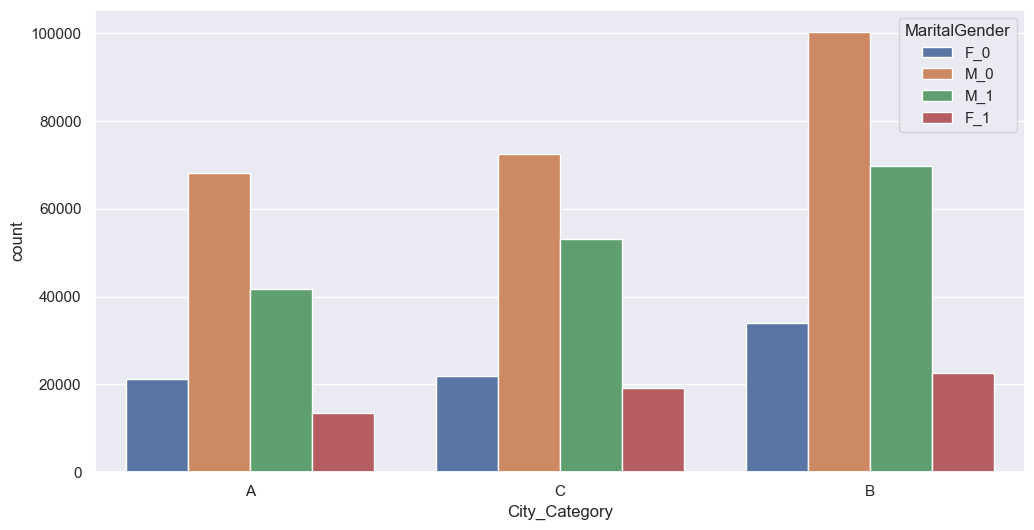

In [238]:
 sns.countplot(data=df,x='City_Category',hue='MaritalGender')